In [2]:
import logging

import matplotlib.pyplot as plt

from jua import JuaClient
from jua.types.geo import LatLon
from jua.weather import Models, Variables

logging.basicConfig(level=logging.INFO)

In [3]:
zurich = LatLon(lat=47.3769, lon=8.5417)

client = JuaClient()
ept1_5 = client.weather.get_model(Models.EPT1_5)
ecmwf_ensemble = client.weather.get_model(Models.ECMWF_IFS_ENSEMBLE)

variables = [
    Variables.AIR_TEMPERATURE_AT_HEIGHT_LEVEL_2M,
]

forecast_horizon_hours = 72  # 3 days

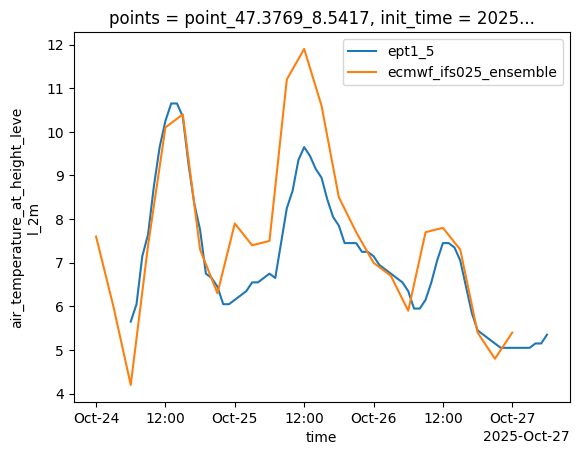

In [4]:
# Compare the latest forecasts
forecast_ept1_5 = ept1_5.get_forecasts(
    points=zurich,
    max_lead_time=forecast_horizon_hours,
    variables=variables,
    print_progress=False,
).to_xarray()
forecast_ecmwf_ensemble = ecmwf_ensemble.get_forecasts(
    points=zurich,
    max_lead_time=forecast_horizon_hours,
    variables=variables,
    print_progress=False,
).to_xarray()

forecast_ept1_5[variables[0]].to_celcius().to_absolute_time().plot(label=ept1_5.name)
forecast_ecmwf_ensemble[variables[0]].to_celcius().to_absolute_time().plot(
    label=ecmwf_ensemble.name
)

plt.legend()
plt.show()

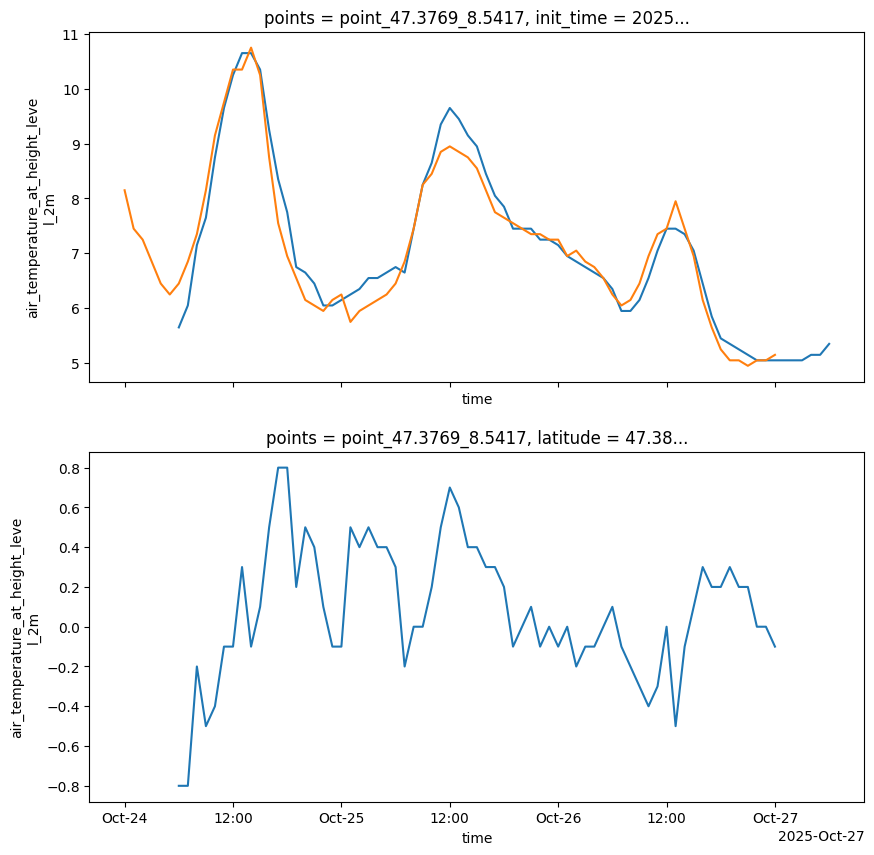

In [ ]:
# Compare how the EPT1.5 forecast has changed between the last run and the latest run
available_forecasts = ept1_5.get_available_forecasts(limit=2)
second_to_last_init_time = available_forecasts.forecasts[1].init_time
forecast_ept1_5_second_to_last = ept1_5.get_forecasts(
    init_time=second_to_last_init_time,
    points=zurich,
    max_lead_time=forecast_horizon_hours,
    variables=variables,
    print_progress=False,
).to_xarray()

ept1_5_temp_latest = forecast_ept1_5[variables[0]].to_celcius().to_absolute_time()
ept1_5_temp_second_to_last = (
    forecast_ept1_5_second_to_last[variables[0]].to_celcius().to_absolute_time()
)

delta = ept1_5_temp_latest.drop_vars(
    "init_time"
) - ept1_5_temp_second_to_last.drop_vars("init_time")

_, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
forecast_ept1_5[variables[0]].to_celcius().to_absolute_time().plot(ax=axs[0])
forecast_ept1_5_second_to_last[variables[0]].to_celcius().to_absolute_time().plot(
    ax=axs[0]
)

delta.plot(ax=axs[1])
plt.show()